In [8]:
import numpy as np
import pandas as pd
from numpy import math
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


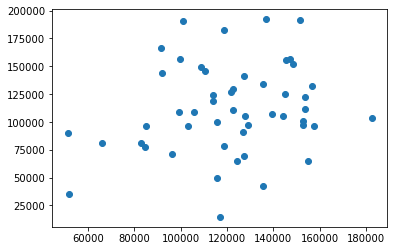

In [10]:
plt.scatter(data['Administration'],data['Profit'],alpha=1)

Text(0, 0.5, 'Profit')

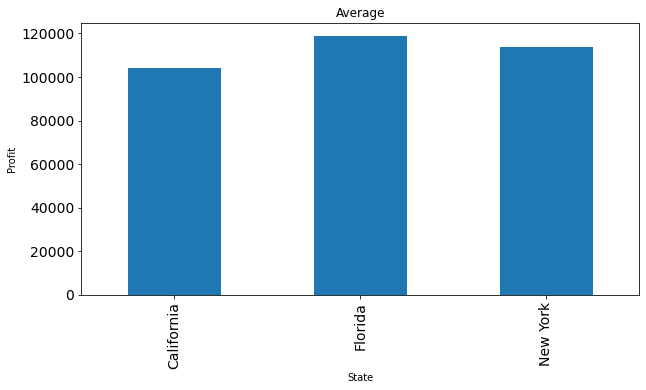

In [11]:
ax =data.groupby('State')['Profit'].mean().plot.bar(figsize=(10,5),fontsize=14)
ax.set_title('Average')
ax.set_xlabel('State')
ax.set_ylabel('Profit')

In [12]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [13]:
# اي هنا في المكان الذي فيه المحدد ضع 1 و لن لم يوجد ضع 0 
data['NewYork'] = np.where(data['State']=='New York',1,0)
data['California'] = np.where(data['State']=='California',1,0)
data['Florida'] = np.where(data['State']=='Florida',1,0)

data.drop(columns=['State'],axis=1,inplace=True)

In [14]:
data

,R&D Spend,Administration,Marketing Spend,Profit,NewYork,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


In [15]:
# الهدف 
dependent_var = 'Profit'

In [16]:
independent_var = data.columns.to_list()

In [17]:
# السمات 
independent_var.remove(dependent_var)

In [18]:
X = data[independent_var].values
y = data[dependent_var]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
X_train

array([[0.38348453, 0.5932935 , 0.09768292, 0.        , 1.        ,
        0.        ],
       [0.23319442, 0.24130912, 0.3709309 , 0.        , 1.        ,
        0.        ],
       [0.47408436, 0.78021012, 0.63532724, 1.        , 0.        ,
        0.        ],
       [0.17335288, 0.57682456, 0.42631115, 0.        , 0.        ,
        1.        ],
       [0.52264964, 0.77823604, 0.        , 1.        , 0.        ,
        0.        ],
       [0.14297577, 0.34185188, 0.31370517, 0.        , 1.        ,
        0.        ],
       [0.        , 0.50014806, 0.09574943, 0.        , 1.        ,
        0.        ],
       [0.45557444, 0.70684477, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.4475048 , 0.54429273, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.55635219, 0.64106561, 0.53555202, 0.        , 1.        ,
        0.        ],
       [0.16869099, 0.25446874, 0.34861436, 0.        , 0.        ,
        1.        ],
       [0.57246821, 0

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)


In [24]:
# متوسط الخطا يدل على أن 8103 متوسط نسبة الخطا 
# أي يمكن أن يكون هناك 8103 فرق عن القيمة الأصلية عند التوقع
math.sqrt(mean_squared_error(y_test,y_pred))


8103.905488442755

In [25]:
r2_score(y_test,y_pred)

0.9710540208911514

In [26]:
lr.predict(scaler.transform([[160000,140000,350000,1,0,0]]))

array([193491.74152374])